In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
%cd /content/gdrive/MyDrive/colorClassification/

/content/gdrive/MyDrive/colorClassification


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel
import torch.nn as nn

# Load the fine-tuned model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
model.classification_head = nn.Linear(512, num_labels)  # Match the classification head with your fine-tuned one
model.load_state_dict(torch.load("fine_tuned-MODEL.pth"))  # Load fine-tuned weights
model.eval()  # Set to evaluation mode

# Move the model to the appropriate device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define the transformation (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))
])

# Load new dataset for evaluation
new_data_path = "dataColor/blue"  # Set the path to your new data
new_dataset = datasets.ImageFolder(root=new_data_path, transform=transform)
new_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Define the loss function (optional, if you want to calculate loss as well)
criterion = nn.CrossEntropyLoss()

# Evaluation loop
total_correct = 0
total_images = 0
eval_loss = 0.0

with torch.no_grad():
    for images, labels in new_loader:
        images, labels = images.to(device), labels.to(device)

        # Get image features and logits
        image_features = model.get_image_features(images)
        logits = model.classification_head(image_features)

        # Optionally compute loss (if you have true labels)
        loss = criterion(logits, labels)
        eval_loss += loss.item() * images.size(0)

        # Predict class
        _, predicted = torch.max(logits, 1)

        # Update metrics
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

# Calculate overall accuracy and loss
accuracy = 100 * total_correct / total_images
eval_loss = eval_loss / total_images

print(f"Evaluation completed. Accuracy: {accuracy:.2f}%, Loss: {eval_loss:.4f}")


<ipython-input-17-ce5f5396b03f>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("fine_tuned-MODEL.pth"))  # Load fine-tuned weights


FileNotFoundError: [Errno 2] No such file or directory: 'dataColor/blue'

In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!unzip  Datacolor.zip

unzip:  cannot find or open Datacolor.zip, Datacolor.zip.zip or Datacolor.zip.ZIP.


In [ ]:
import os

# Path to the dataset folder
dataset_path = "B"

# Function to print the folder structure
def print_folder_structure(dataset_path):
    # Walk through the directory
    for root, dirs, files in os.walk(dataset_path):
        level = root.replace(dataset_path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

# Call the function to print the structure
print_folder_structure(dataset_path)

B/
    Yellow/
        11150901_17.jpg
        11150928_140.jpg
        11150928_143.jpg
        snap_201202221055113950_蒙A0987B_蓝_20120222105532_2.jpg
        snap_201202221107459640_蒙KY8648_蓝_20120222110752_1.jpg
        snap_201202221505347390_蒙KY7646_蓝_20120222150543_1.jpg
        snap_201202221614593820_蒙K59068_蓝_20120222161502_2.jpg
        snap_201202221700437010_蒙KY7671_蓝_20120222170052_2.jpg
        snap_201202230908267270_蒙K6M820_蓝_20120223090828_1.jpg
        snap_201202240912021650_蒙KY7680_蓝_20120224091203_2.jpg
        snap_201202240927557250_蒙KY8116_蓝_20120224092808_2.jpg
        snap_201202231608564980_蒙K6M820_蓝_20120223160900_1.jpg
        snap_201202240958056330_蒙KB5208_蓝_20120224095822_2.jpg
        snap_201202241014112420_蒙KJ9968_蓝_20120224101410_2.jpg
        snap_201202240946065220_蒙KJE899_蓝_20120224094623_2.jpg
        snap_201202241105050130_蒙KY8097_蓝_20120224110505_1.jpg
        snap_201202241044393870_蒙LXL186_蓝_20120224104447_2.jpg
        snap_2012022410435046

In [ ]:
!pip install torch torchvision transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
!pip install torch torchvision transformers datasets
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define the transformation for your images (resize, normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to CLIP input size
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711)) # CLIP normalization
])

# Load your dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel

# Load the pre-trained CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Send model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
from torch import nn

# Fine-tuning the vision encoder (image branch)
num_labels = len(dataset.classes)  # Number of colors (classes)

# Add a new classification head on top of CLIP's vision model
model.classification_head = nn.Linear(512, num_labels)

# Send the classification head to the correct device
model.classification_head = model.classification_head.to(device)

In [ ]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss

# Define loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        image_features = model.get_image_features(images)
        logits = model.classification_head(image_features)

        # Compute loss and backpropagate
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        # Track training metrics
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = 100 * correct / total

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")


Epoch 1/5, Loss: 0.4506, Accuracy: 88.17%
Epoch 2/5, Loss: 0.0863, Accuracy: 98.18%
Epoch 3/5, Loss: 0.0547, Accuracy: 98.62%
Epoch 4/5, Loss: 0.0202, Accuracy: 99.47%
Epoch 5/5, Loss: 0.0055, Accuracy: 100.00%
Training complete.


In [ ]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss
import torch

# Define loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Early Stopping parameters
patience = 3  # Stop if no improvement after 'patience' epochs
best_val_loss = float('inf')
patience_counter = 0

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        image_features = model.get_image_features(images)
        logits = model.classification_head(image_features)

        # Compute loss and backpropagate
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        # Track training metrics
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = 100 * correct / total

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_images, val_labels in val_loader:  # Assuming you have val_loader
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_image_features = model.get_image_features(val_images)
            val_logits = model.classification_head(val_image_features)
            v_loss = criterion(val_logits, val_labels)

            val_loss += v_loss.item() * val_images.size(0)
            _, val_predicted = torch.max(val_logits, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
    torch.save(model.state_dict(), "fine_tuned-MODEL.pth")
    # Check for Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset the counter if validation loss improves
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

print("Training complete.")


Epoch 1/5, Loss: 0.4687, Accuracy: 87.57%, Val Loss: 0.1679, Val Accuracy: 95.60%
Epoch 2/5, Loss: 0.0956, Accuracy: 97.74%, Val Loss: 0.0962, Val Accuracy: 96.98%
Epoch 3/5, Loss: 0.0373, Accuracy: 99.02%, Val Loss: 0.0573, Val Accuracy: 98.74%
Epoch 4/5, Loss: 0.0241, Accuracy: 99.40%, Val Loss: 0.0456, Val Accuracy: 98.49%
Epoch 5/5, Loss: 0.0377, Accuracy: 99.12%, Val Loss: 0.0556, Val Accuracy: 98.24%
Training complete.


##**texte en gras:** **fine tune color**

In [ ]:
import os

# Path to the dataset folder
dataset_path = "DATAInput"

# Function to print the folder structure
def print_folder_structure(dataset_path):
    # Walk through the directory
    for root, dirs, files in os.walk(dataset_path):
        level = root.replace(dataset_path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

# Call the function to print the structure
print_folder_structure(dataset_path)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
        snap_201202221143358270_蒙KVV655_蓝_20120222114340_2.jpg
        snap_201202221142175690_蒙KLH908_蓝_20120222114237_1.jpg
        snap_201202221143406090_蒙KZH933_蓝_20120222114351_1.jpg
        snap_201202221142089780_蒙KK8587_蓝_20120222114226_2.jpg
        snap_201202221143358270_蒙KVV655_蓝_20120222114340_1.jpg
        snap_201202221142175690_蒙KLH908_蓝_20120222114237_2.jpg
        snap_201202221143590890_蒙KC5475_蓝_20120222114409_1.jpg
        snap_201202221143406090_蒙KZH933_蓝_20120222114351_2.jpg
        snap_201202221144170840_蒙KD0395_蓝_20120222114436_1.jpg
        snap_201202221144195250_蒙KXX052_蓝_20120222114424_1.jpg
        snap_201202221143590890_蒙KC5475_蓝_20120222114409_2.jpg
        snap_201202221144071850_豫HE6618_蓝_20120222114419_2.jpg
        snap_201202221144071850_豫HE6618_蓝_20120222114418_1.jpg
        snap_201202221144591310_蒙KE1090_蓝_20120222114503_2.jpg
        snap_201202221144403850_蒙KYH576_

In [ ]:
!pip install torch torchvision transformers datasets
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define the transformation for your images (resize, normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to CLIP input size
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711)) # CLIP normalization
])

# Load your dataset
dataset = datasets.ImageFolder(root="DATAInput", transform=transform)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel

# Load the pre-trained CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Send model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
from torch import nn

# Fine-tuning the vision encoder (image branch)
num_labels = len(dataset.classes)  # Number of colors (classes)

# Add a new classification head on top of CLIP's vision model
model.classification_head = nn.Linear(512, num_labels)

# Send the classification head to the correct device
model.classification_head = model.classification_head.to(device)

In [ ]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss
import torch

# Define loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Early Stopping parameters
patience = 3  # Stop if no improvement after 'patience' epochs
best_val_loss = float('inf')
patience_counter = 0

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        image_features = model.get_image_features(images)
        logits = model.classification_head(image_features)

        # Compute loss and backpropagate
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        # Track training metrics
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = 100 * correct / total

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_images, val_labels in val_loader:  # Assuming you have val_loader
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_image_features = model.get_image_features(val_images)
            val_logits = model.classification_head(val_image_features)
            v_loss = criterion(val_logits, val_labels)

            val_loss += v_loss.item() * val_images.size(0)
            _, val_predicted = torch.max(val_logits, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
    torch.save(model.state_dict(), "fine_tuned-MODEL-all.pth")
    # Check for Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset the counter if validation loss improves
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

print("Training complete.")


Epoch 1/5, Loss: 0.3482, Accuracy: 89.43%, Val Loss: 0.2318, Val Accuracy: 92.54%
Epoch 2/5, Loss: 0.1284, Accuracy: 95.85%, Val Loss: 0.1759, Val Accuracy: 94.63%
Epoch 3/5, Loss: 0.0822, Accuracy: 97.31%, Val Loss: 0.2027, Val Accuracy: 94.08%
Epoch 4/5, Loss: 0.0565, Accuracy: 98.17%, Val Loss: 0.1998, Val Accuracy: 93.74%
Epoch 5/5, Loss: 0.0475, Accuracy: 98.44%, Val Loss: 0.2153, Val Accuracy: 94.32%
Early stopping triggered.
Training complete.


finetuned  **texte en gras**

In [ ]:
torch.save(model.state_dict(), "fine_tuned-COLOR-all.pth")
model.eval()  # Switch to evaluation mode

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import torch

In [ ]:
# Load the best model (optional if using early stopping)
# model.load_state_dict(torch.load("fine_tuned-COLOR.pth"))
# model.eval()  # Set model to evaluation mode

# Initialize lists to store predictions and labels
all_preds = []
all_labels = []

# Run evaluation on test data
with torch.no_grad():
    for images, labels in val_loader:  # Assuming test_loader is defined
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        image_features = model.get_image_features(images)
        logits = model.classification_head(image_features)

        # Get predictions
        _, predicted = torch.max(logits, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)
classification_report_str = classification_report(all_labels, all_preds)

# Print metrics
print(f"Test Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

Test Accuracy: 0.94
Confusion Matrix:
[[669   0   0   8   1   0   0   0]
 [  9 220   1   2   2   0   0   0]
 [  0   0  55   0   0   0   0   0]
 [ 24   0   0 518   3   0  67   1]
 [  3   2   0  11  86   1   0   1]
 [  1   0   0   1   0 380   0   1]
 [  0   0   0  24   0   0 723   0]
 [  0   0   0   1   0   1   1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       678
           1       0.99      0.94      0.96       234
           2       0.98      1.00      0.99        55
           3       0.92      0.85      0.88       613
           4       0.93      0.83      0.88       104
           5       0.99      0.99      0.99       383
           6       0.91      0.97      0.94       747
           7       0.97      0.97      0.97       110

    accuracy                           0.94      2924
   macro avg       0.96      0.94      0.95      2924
weighted avg       0.94      0.94      0.94      2924



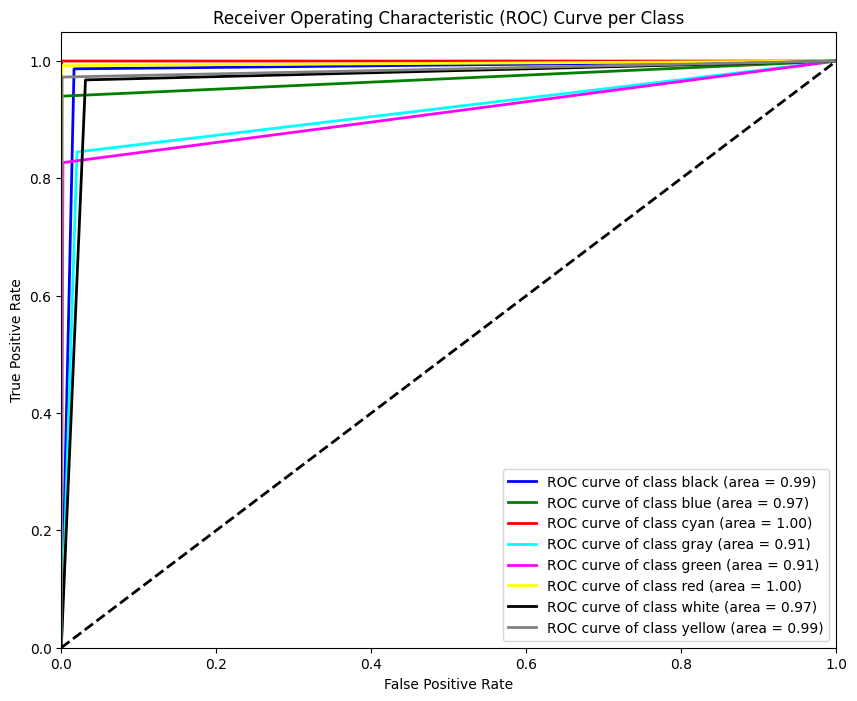

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the labels for multi-class
y_bin = label_binarize(all_labels, classes=np.arange(len(class_names)))
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], np.array(all_preds) == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve per Class')
plt.legend(loc="lower right")
plt.show()


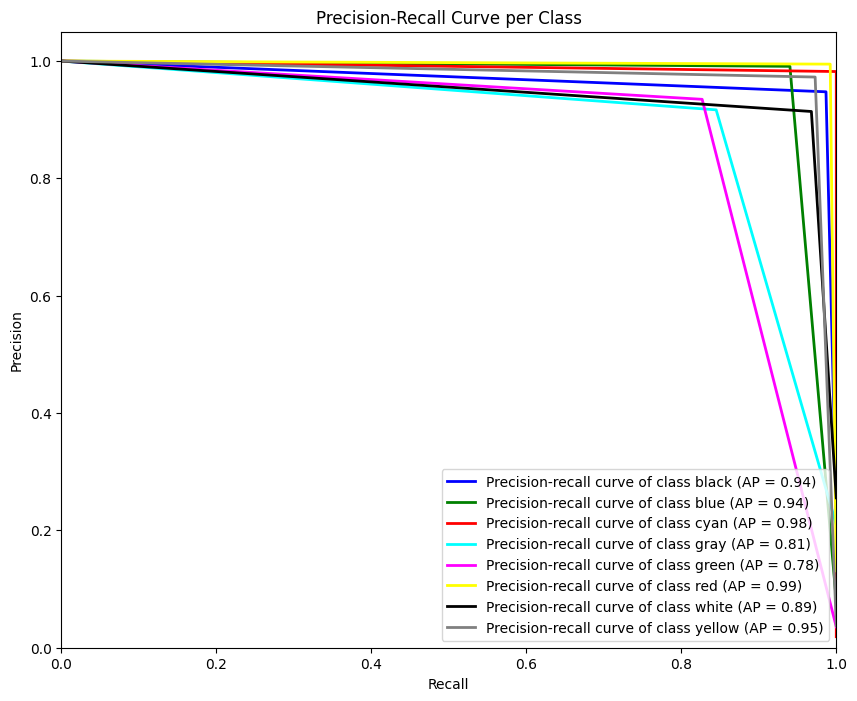

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], np.array(all_preds) == i)
    average_precision[i] = average_precision_score(y_bin[:, i], np.array(all_preds) == i)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-recall curve of class {class_names[i]} (AP = {average_precision[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Class')
plt.legend(loc="lower right")
plt.show()


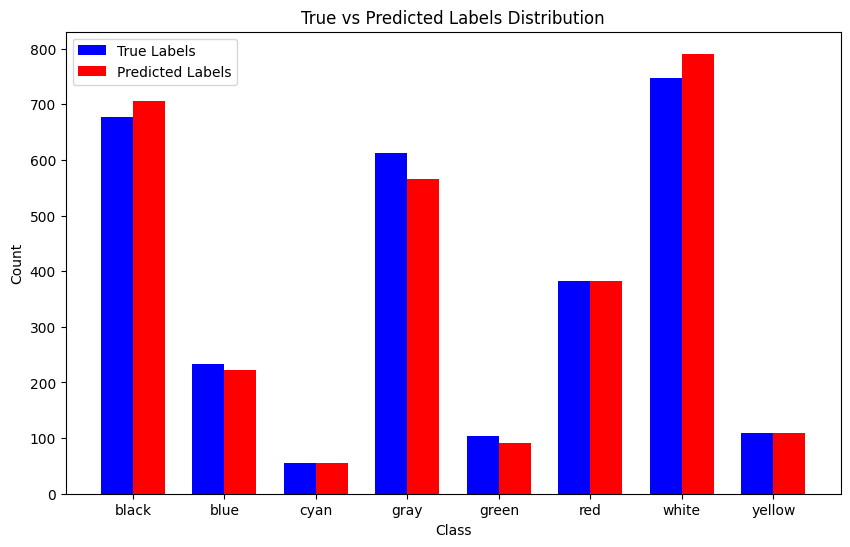

In [ ]:
true_label_counts = np.bincount(all_labels, minlength=len(class_names))
pred_label_counts = np.bincount(all_preds, minlength=len(class_names))

# Plot the distribution of true vs predicted labels
plt.figure(figsize=(10, 6))
index = np.arange(len(class_names))
bar_width = 0.35

plt.bar(index, true_label_counts, bar_width, color='b', label='True Labels')
plt.bar(index + bar_width, pred_label_counts, bar_width, color='r', label='Predicted Labels')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True vs Predicted Labels Distribution')
plt.xticks(index + bar_width / 2, class_names)
plt.legend()
plt.show()


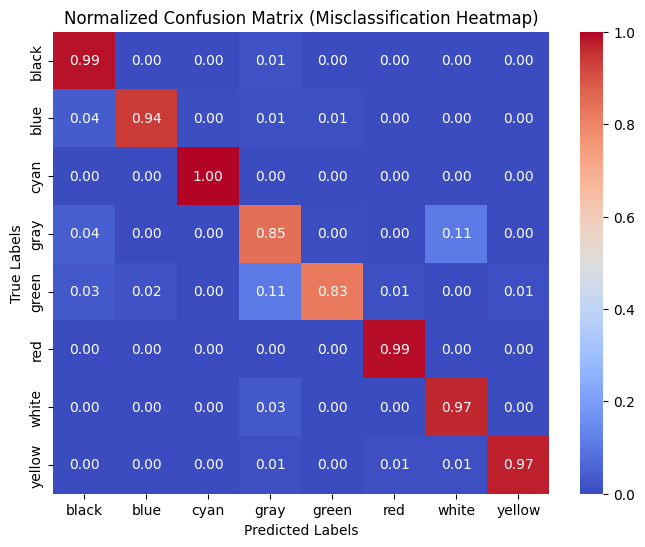

In [ ]:
# Normalize confusion matrix to get misclassification ratios
normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot misclassification heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix (Misclassification Heatmap)')
plt.show()


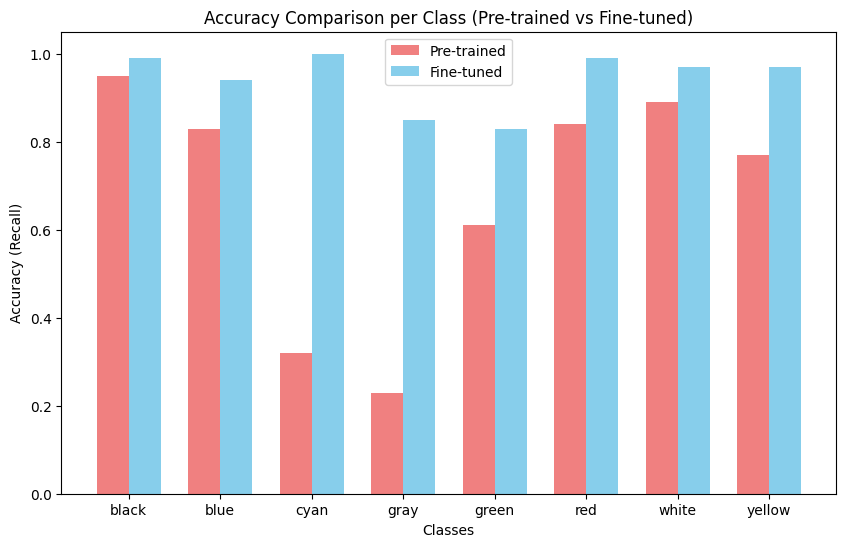

In [ ]:
pretrained_class_acc = [0.95, 0.83, 0.32, 0.23, 0.61, 0.84, 0.89, 0.77]  # Pre-trained recalls
finetuned_class_acc = [0.99, 0.94, 1.00, 0.85, 0.83, 0.99, 0.97, 0.97]  # Fine-tuned recalls

index = np.arange(len(class_names))  # class_names = ['black', 'blue', 'cyan', 'gray', 'green', 'red', 'white', 'yellow']
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(index, pretrained_class_acc, bar_width, label='Pre-trained', color='lightcoral')
plt.bar(index + bar_width, finetuned_class_acc, bar_width, label='Fine-tuned', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy (Recall)')
plt.xticks(index + bar_width / 2, class_names)
plt.title('Accuracy Comparison per Class (Pre-trained vs Fine-tuned)')
plt.legend()
plt.show()


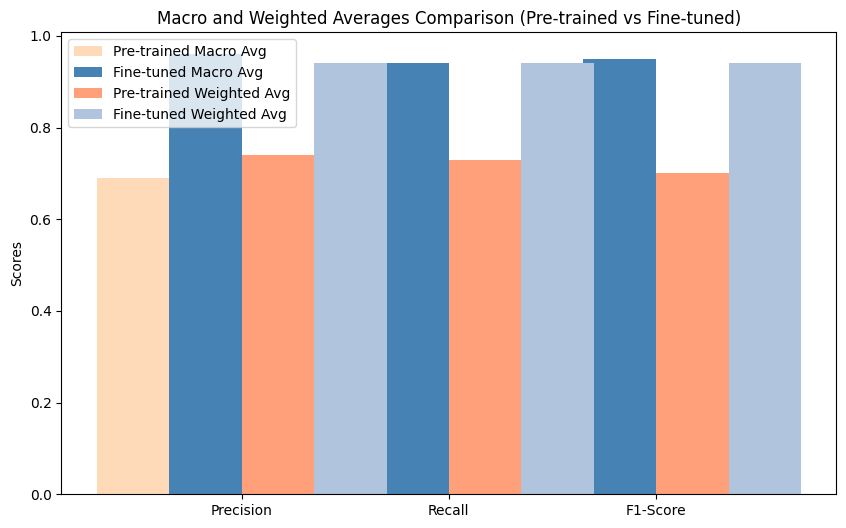

In [ ]:
metrics = ['Precision', 'Recall', 'F1-Score']
pretrained_macro = [0.69, 0.68, 0.66]
finetuned_macro = [0.96, 0.94, 0.95]
pretrained_weighted = [0.74, 0.73, 0.70]
finetuned_weighted = [0.94, 0.94, 0.94]

index = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(index, pretrained_macro, bar_width, label='Pre-trained Macro Avg', color='peachpuff')
plt.bar(index + bar_width, finetuned_macro, bar_width, label='Fine-tuned Macro Avg', color='steelblue')
plt.bar(index + 2 * bar_width, pretrained_weighted, bar_width, label='Pre-trained Weighted Avg', color='lightsalmon')
plt.bar(index + 3 * bar_width, finetuned_weighted, bar_width, label='Fine-tuned Weighted Avg', color='lightsteelblue')

plt.xticks(index + 1.5 * bar_width, metrics)
plt.ylabel('Scores')
plt.title('Macro and Weighted Averages Comparison (Pre-trained vs Fine-tuned)')
plt.legend()
plt.show()


Test Accuracy: 0.94
Confusion Matrix:
[[669   0   0   8   1   0   0   0]
 [  9 220   1   2   2   0   0   0]
 [  0   0  55   0   0   0   0   0]
 [ 24   0   0 518   3   0  67   1]
 [  3   2   0  11  86   1   0   1]
 [  1   0   0   1   0 380   0   1]
 [  0   0   0  24   0   0 723   0]
 [  0   0   0   1   0   1   1 107]]
Classification Report:
              precision    recall  f1-score   support

       black       0.95      0.99      0.97       678
        blue       0.99      0.94      0.96       234
        cyan       0.98      1.00      0.99        55
        gray       0.92      0.85      0.88       613
       green       0.93      0.83      0.88       104
         red       0.99      0.99      0.99       383
       white       0.91      0.97      0.94       747
      yellow       0.97      0.97      0.97       110

    accuracy                           0.94      2924
   macro avg       0.96      0.94      0.95      2924
weighted avg       0.94      0.94      0.94      2924



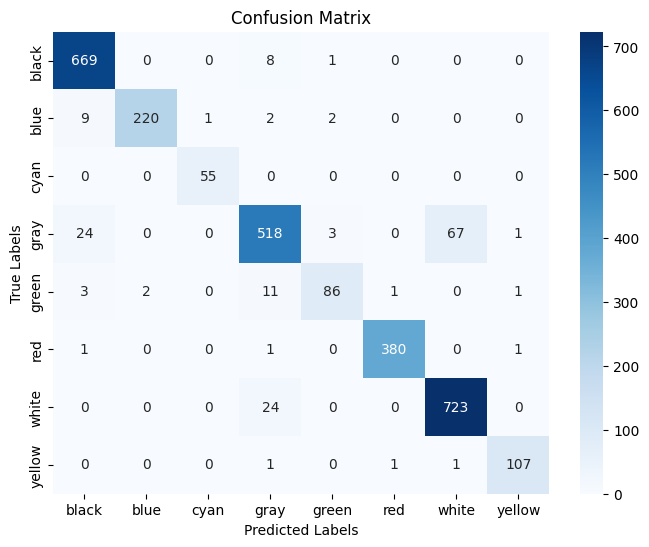

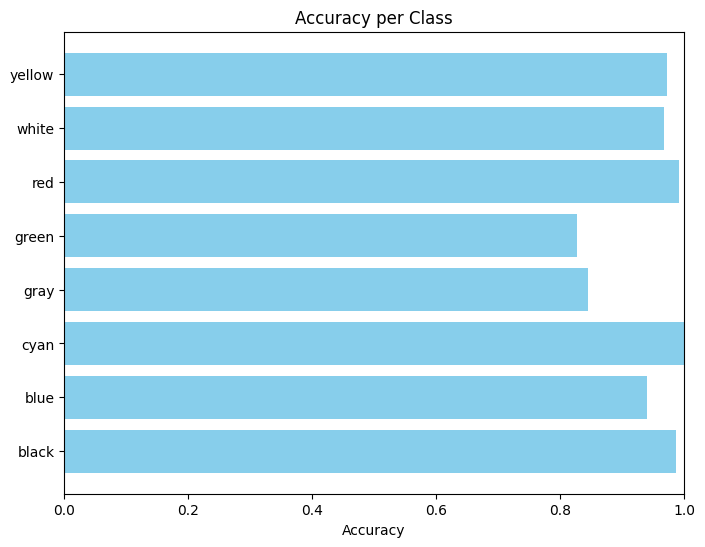

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming your val_loader is already defined and images are processed

# Load the best model (optional if using early stopping)
# model.load_state_dict(torch.load("fine_tuned-COLOR.pth"))
# model.eval()  # Set model to evaluation mode

# Initialize lists to store predictions and labels
all_preds = []
all_labels = []
class_names = ['black', 'blue', 'cyan', 'gray', 'green', 'red', 'white', 'yellow']
# Run evaluation on test data
with torch.no_grad():
    for images, labels in val_loader:  # Assuming val_loader is defined
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        image_features = model.get_image_features(images)
        logits = model.classification_head(image_features)

        # Get predictions
        _, predicted = torch.max(logits, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)
classification_report_str = classification_report(all_labels, all_preds, target_names=class_names)

# Print metrics
print(f"Test Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot a bar graph of accuracy for each class
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
plt.figure(figsize=(8, 6))
plt.barh(class_names, class_accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy per Class')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1 for percentage
plt.show()


In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from torchvision import transforms

# Define the model architecture
class CLIPWithClassificationHead(CLIPModel):
    def __init__(self, config):
        super().__init__(config)
        self.classification_head = torch.nn.Linear(512, 8)  # Assuming 8 classes

    def forward(self, pixel_values, **kwargs):
        image_features = self.get_image_features(pixel_values)
        logits = self.classification_head(image_features)
        return logits

# Load the fine-tuned model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPWithClassificationHead.from_pretrained("openai/clip-vit-base-patch32")
model.load_state_dict(torch.load("fine_tuned-MODEL.pth"))
model.to(device)
model.eval()

# Define the image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size used during training
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization used during training
])

# Load and preprocess the new image
image_path = "Blue/11133_879.jpg"
image = Image.open(image_path).convert("RGB")
image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available

# Make predictions
with torch.no_grad():
    logits = model(image)
    probabilities = torch.softmax(logits, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)

# Output the results
print("Predicted Class:", predicted_class.item())
print("Class Probabilities:", probabilities)


Some weights of CLIPWithClassificationHead were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classification_head.bias', 'classification_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-17-f8184df51ce3>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

Predicted Class: 1
Class Probabilities: tensor([[0.0036, 0.9812, 0.0032, 0.0020, 0.0029, 0.0015, 0.0029, 0.0026]])


# **USE CLIP MODEL WITHOUT FINETUNNIG**

Overall Accuracy: 73.08%

Confusion Matrix:
[[3275   26    5   22   39    7   64    4]
 [  80  900   35    7   57    1    4    2]
 [   0  137   89    0   29    0   26    0]
 [ 805  125   49  693   82   26 1259    7]
 [  54    6   42   56  294    0   26    4]
 [ 129   13    7   51   47 1634   53    7]
 [ 103  104   24  112   44   20 3350    4]
 [   7    6    3    3   48    9   56  449]]


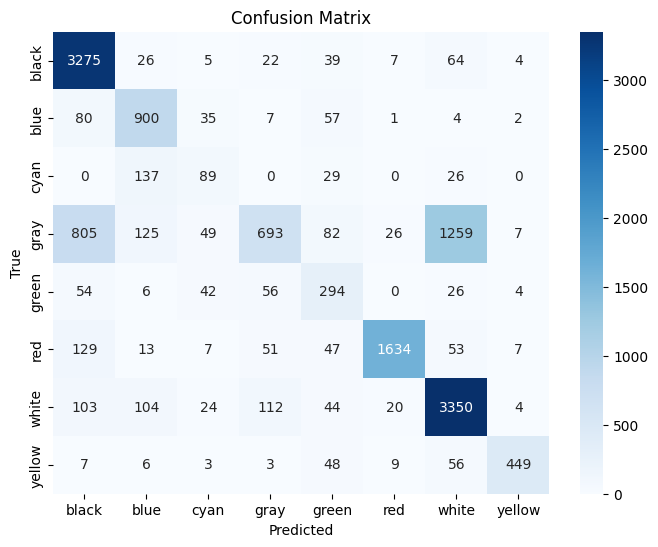


Classification Report:
              precision    recall  f1-score   support

       black       0.74      0.95      0.83      3442
        blue       0.68      0.83      0.75      1086
        cyan       0.35      0.32      0.33       281
        gray       0.73      0.23      0.35      3046
       green       0.46      0.61      0.52       482
         red       0.96      0.84      0.90      1941
       white       0.69      0.89      0.78      3761
      yellow       0.94      0.77      0.85       581

    accuracy                           0.73     14620
   macro avg       0.69      0.68      0.66     14620
weighted avg       0.74      0.73      0.70     14620



In [ ]:
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel
import os
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

# Load processor for handling images and text
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define the text prompts for different colors (change these based on your classes)
color_prompts = ["a black car", "a blue car", "a cyan car", "a gray car",
                 "a green car", "a red car", "a white car", "a yellow car"]

# Tokenize the color prompts
text_inputs = processor(text=color_prompts, return_tensors="pt", padding=True).to(device)


# Get text features and normalize
text_features = model.get_text_features(**text_inputs)
text_features = text_features / text_features.norm(dim=-1, keepdim=True)  # Normalize text features

# Define the image folder path and expected ground truth color for each set
image_folders = {"black": "DATAInput/Black", "blue": "DATAInput/Blue", "cyan": "DATAInput/Cyan",
                 "gray": "DATAInput/Gray", "green": "DATAInput/Green", "red": "DATAInput/Red",
                 "white": "DATAInput/White", "yellow": "DATAInput/Yellow"}

# Initialize performance metrics
y_true = []
y_pred = []

# Iterate over each folder (each color class)
for color, folder_path in image_folders.items():
    for image_file in os.listdir(folder_path):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            # Load and preprocess the image
            image_path = os.path.join(folder_path, image_file)
            image = Image.open(image_path)

            # Preprocess the image
            image_inputs = processor(images=image, return_tensors="pt").to(device)

            # Get image features and normalize
            image_features = model.get_image_features(**image_inputs)
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)

            # Compute cosine similarity between image and text features
            similarities = torch.matmul(image_features, text_features.T).squeeze(0)

            # Get the color with the highest similarity score
            predicted_color_idx = similarities.argmax().item()
            predicted_color = color_prompts[predicted_color_idx].split()[1]  # extract color from prompt

            # Store the ground truth and predicted labels for evaluation
            y_true.append(color)
            y_pred.append(predicted_color)

# Get unique labels from ground truth and predictions
unique_labels = sorted(list(set(y_true + y_pred)))

# Convert color names to numerical labels
color_to_label = {color: i for i, color in enumerate(unique_labels)}
y_true_labels = [color_to_label[color] for color in y_true]
y_pred_labels = [color_to_label[color] for color in y_pred]

# Calculate overall accuracy using numerical labels
accuracy = (torch.tensor(y_true_labels) == torch.tensor(y_pred_labels)).sum().item() / len(y_true_labels) * 100
print(f"Overall Accuracy: {accuracy:.2f}%")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_labels)
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
class_report = classification_report(y_true, y_pred, target_names=unique_labels)
print(class_report)


# **TEST AN IMAGE**

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from torchvision import transforms

class CLIPWithClassificationHead(CLIPModel):
    def __init__(self, config):
        super().__init__(config)
        self.classification_head = torch.nn.Linear(512, 8)  # Adjust the output size for your task

    def forward(self, pixel_values, **kwargs):
        image_features = self.get_image_features(pixel_values)
        logits = self.classification_head(image_features)
        return logits

# Load the fine-tuned model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPWithClassificationHead.from_pretrained("openai/clip-vit-base-patch32")
model.load_state_dict(torch.load("fine_tuned-COLOR-all.pth", map_location=device))
model.to(device)
model.eval()

# Define the image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size used during training
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization used during training
])

# Load and preprocess the new image
image_path = "Blue/11133_879.jpg"
image = Image.open(image_path).convert("RGB")
image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available

# Make predictions
with torch.no_grad():
    logits = model(image)
    probabilities = torch.softmax(logits, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)

# Output the results
print("Predicted Class:", predicted_class.item())
print("Class Probabilities:", probabilities)


Some weights of CLIPWithClassificationHead were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classification_head.bias', 'classification_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-18-b881b2dff61f>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

Predicted Class: 1
Class Probabilities: tensor([[0.0036, 0.9812, 0.0032, 0.0020, 0.0029, 0.0015, 0.0029, 0.0026]])


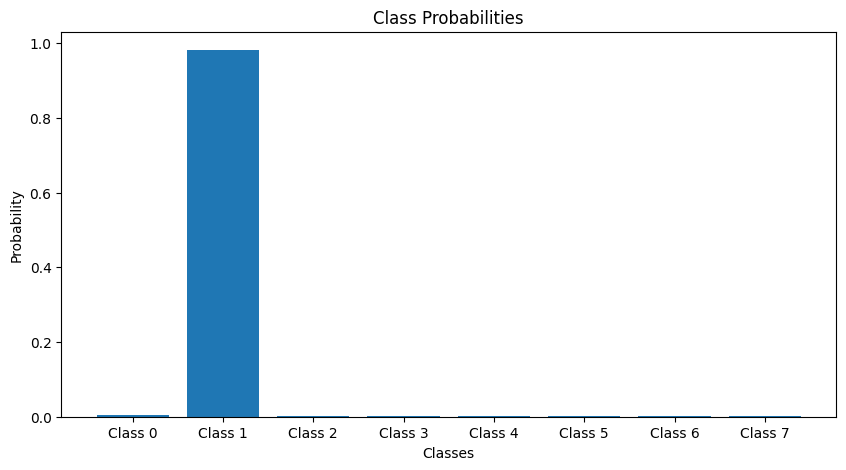

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `probabilities` contains the probabilities of each class
probabilities = probabilities.squeeze().cpu().numpy()  # Remove batch dimension and move to CPU

# Plot class probabilities
plt.figure(figsize=(10, 5))
plt.bar(range(len(probabilities)), probabilities, tick_label=[f'Class {i}' for i in range(len(probabilities))])
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Class Probabilities')
plt.show()

Some weights of CLIPWithClassificationHead were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classification_head.bias', 'classification_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-21-9f564181e84b>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

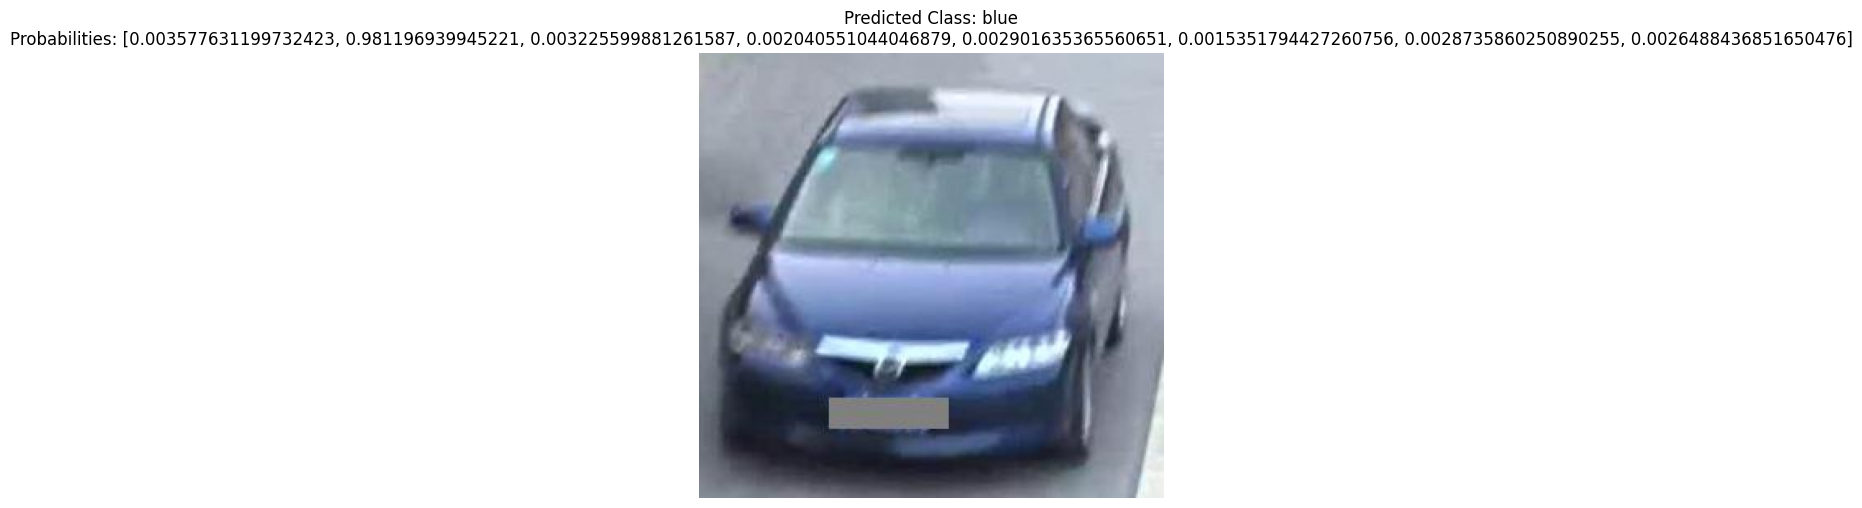

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Define class names
class_names = ['black', 'blue', 'cyan', 'gray', 'green', 'red', 'white', 'yellow']

class CLIPWithClassificationHead(CLIPModel):
    def __init__(self, config):
        super().__init__(config)
        self.classification_head = torch.nn.Linear(512, 8)  # Adjust the output size for your task

    def forward(self, pixel_values, **kwargs):
        image_features = self.get_image_features(pixel_values)
        logits = self.classification_head(image_features)
        return logits

# Load the fine-tuned model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPWithClassificationHead.from_pretrained("openai/clip-vit-base-patch32")
model.load_state_dict(torch.load("fine_tuned-MODEL.pth", map_location=device))
model.to(device)
model.eval()

# Define the image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size used during training
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization used during training
])

# Load and preprocess the new image
image_path = "Blue/11133_879.jpg"
image = Image.open(image_path).convert("RGB")
preprocessed_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available

# Make predictions
with torch.no_grad():
    logits = model(preprocessed_image)
    probabilities = torch.softmax(logits, dim=1)
    predicted_class_idx = torch.argmax(probabilities, dim=1).item()
    predicted_class = class_names[predicted_class_idx]

# Plot the image with predictions
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class}\nProbabilities: {probabilities[0].tolist()}")
plt.show()


Some weights of CLIPWithClassificationHead were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classification_head.bias', 'classification_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-26-9a0100aa29ea>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

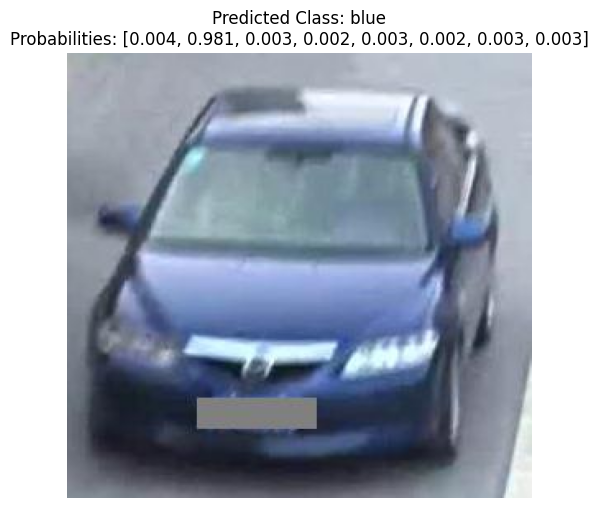

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Define class names
class_names = ['black', 'blue', 'cyan', 'gray', 'green', 'red', 'white', 'yellow']

class CLIPWithClassificationHead(CLIPModel):
    def __init__(self, config):
        super().__init__(config)
        self.classification_head = torch.nn.Linear(512, 8)  # Adjust the output size for your task

    def forward(self, pixel_values, **kwargs):
        image_features = self.get_image_features(pixel_values)
        logits = self.classification_head(image_features)
        return logits

# Load the fine-tuned model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPWithClassificationHead.from_pretrained("openai/clip-vit-base-patch32")
model.load_state_dict(torch.load("fine_tuned-MODEL.pth", map_location=device))
model.to(device)
model.eval()

# Define the image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size used during training
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization used during training
])

# Load and preprocess the new image
image_path = "Blue/11133_879.jpg"
image = Image.open(image_path).convert("RGB")
preprocessed_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available

# Make predictions
with torch.no_grad():
    logits = model(preprocessed_image)
    probabilities = torch.softmax(logits, dim=1)
    predicted_class_idx = torch.argmax(probabilities, dim=1).item()
    predicted_class = class_names[predicted_class_idx]

    # Round probabilities to 3 decimal places
    rounded_probabilities = [round(prob, 3) for prob in probabilities[0].tolist()]

# Plot the image with predictions
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class}\nProbabilities: {rounded_probabilities}")
plt.show()


Some weights of CLIPWithClassificationHead were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classification_head.bias', 'classification_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-25-de77594a8076>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

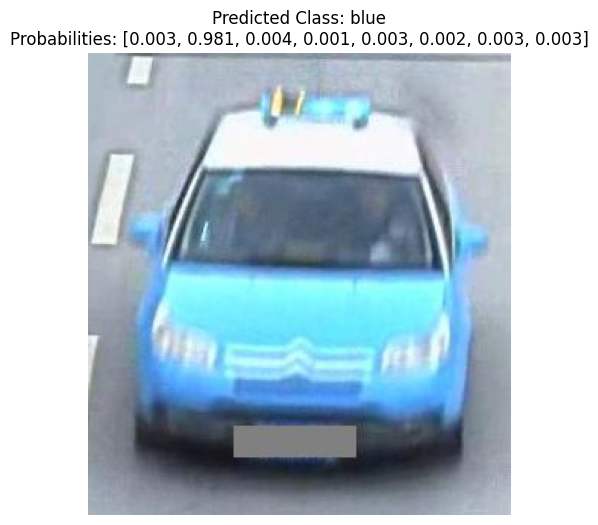

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Define class names
class_names = ['black', 'blue', 'cyan', 'gray', 'green', 'red', 'white', 'yellow']

class CLIPWithClassificationHead(CLIPModel):
    def __init__(self, config):
        super().__init__(config)
        self.classification_head = torch.nn.Linear(512, 8)  # Adjust the output size for your task

    def forward(self, pixel_values, **kwargs):
        image_features = self.get_image_features(pixel_values)
        logits = self.classification_head(image_features)
        return logits

# Load the fine-tuned model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPWithClassificationHead.from_pretrained("openai/clip-vit-base-patch32")
model.load_state_dict(torch.load("fine_tuned-MODEL.pth", map_location=device))
model.to(device)
model.eval()

# Define the image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size used during training
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization used during training
])

# Load and preprocess the new image
image_path = "Blue/11133_1184.jpg"
image = Image.open(image_path).convert("RGB")
preprocessed_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available

# Make predictions
with torch.no_grad():
    logits = model(preprocessed_image)
    probabilities = torch.softmax(logits, dim=1)
    predicted_class_idx = torch.argmax(probabilities, dim=1).item()
    predicted_class = class_names[predicted_class_idx]

    # Round probabilities to 3 decimal places
    rounded_probabilities = [round(prob, 3) for prob in probabilities[0].tolist()]

# Plot the image with predictions
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class}\nProbabilities: {rounded_probabilities}")
plt.show()


In [ ]:
!pip install torchviz # install the missing module
import torch
from torchviz import make_dot
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from torchvision import transforms

# Define class names
class_names = ['black', 'blue', 'cyan', 'gray', 'green', 'red', 'white', 'yellow']

class CLIPWithClassificationHead(CLIPModel):
    def __init__(self, config):
        super().__init__(config)
        self.classification_head = torch.nn.Linear(512, 8)  # Adjust the output size for your task

    def forward(self, pixel_values, **kwargs):
        image_features = self.get_image_features(pixel_values)
        logits = self.classification_head(image_features)
        return logits

# Load the fine-tuned model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPWithClassificationHead.from_pretrained("openai/clip-vit-base-patch32")
model.load_state_dict(torch.load("fine_tuned-MODEL.pth", map_location=device))
model.to(device)
model.eval()

# Define the image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size used during training
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization used during training
])

# Load and preprocess the new image
image_path = "Blue/11133_1184.jpg"
image = Image.open(image_path).convert("RGB")
preprocessed_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available


# Create a dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Generate the graph
output = model(dummy_input)
graph = make_dot(output, params=dict(model.named_parameters()))

# Render the graph to a file
graph.render("model_graph", format="png")


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=22c9f6afcb74fe5fe04876dea8dbe211557ec8dd8b5e1c5bbf51061772d11142
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


Some weights of CLIPWithClassificationHead were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classification_head.bias', 'classification_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-13-ff520b5a1057>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

'model_graph.png'

Some weights of CLIPWithClassificationHead were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classification_head.bias', 'classification_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-3b1890b24608>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

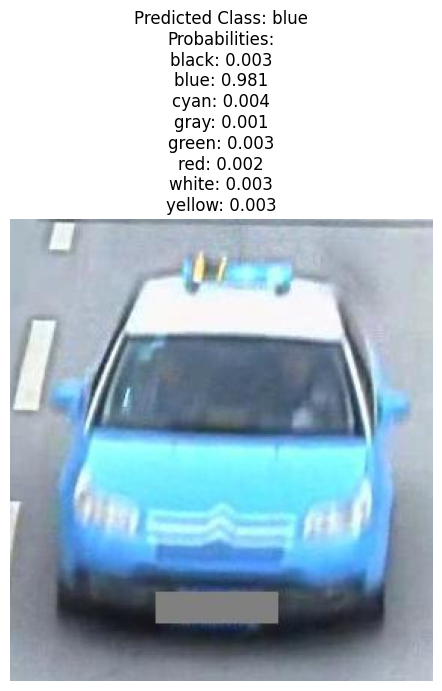

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Define class names
class_names = ['black', 'blue', 'cyan', 'gray', 'green', 'red', 'white', 'yellow']

class CLIPWithClassificationHead(CLIPModel):
    def __init__(self, config):
        super().__init__(config)
        self.classification_head = torch.nn.Linear(512, 8)  # Adjust the output size for your task

    def forward(self, pixel_values, **kwargs):
        image_features = self.get_image_features(pixel_values)
        logits = self.classification_head(image_features)
        return logits

# Load the fine-tuned model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPWithClassificationHead.from_pretrained("openai/clip-vit-base-patch32")
model.load_state_dict(torch.load("fine_tuned-MODEL.pth", map_location=device))
model.to(device)
model.eval()

# Define the image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size used during training
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization used during training
])

# Load and preprocess the new image
image_path = "Blue/11133_1184.jpg"
image = Image.open(image_path).convert("RGB")
preprocessed_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available

# Make predictions
with torch.no_grad():
    logits = model(preprocessed_image)
    probabilities = torch.softmax(logits, dim=1)
    predicted_class_idx = torch.argmax(probabilities, dim=1).item()
    predicted_class = class_names[predicted_class_idx]

    # Round probabilities to 3 decimal places and pair them with class names
    labeled_probabilities = {class_names[i]: round(prob, 3) for i, prob in enumerate(probabilities[0].tolist())}

# Plot the image with predictions
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')

# Create a title showing the predicted class and labeled probabilities
probability_text = "\n".join([f"{label}: {prob}" for label, prob in labeled_probabilities.items()])
plt.title(f"Predicted Class: {predicted_class}\nProbabilities:\n{probability_text}")

plt.show()


In [ ]:

for images, labels in val_loader:
  print(labels)

tensor([3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 2, 3, 3, 2, 3, 3, 3, 3,
        3, 7, 3, 3, 3, 2, 3, 2])
tensor([2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 5, 3, 3, 3,
        3, 3, 3, 3, 3, 4, 3, 3])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3, 5, 7, 3, 3,
        3, 3, 5, 3, 3, 3, 1, 3])
tensor([3, 3, 3, 3, 3, 3, 3, 4, 3, 6, 3, 3, 4, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 5])
tensor([2, 3, 3, 3, 3, 3, 4, 7, 3, 3, 2, 3, 2, 5, 3, 2, 2, 5, 2, 3, 7, 3, 3, 3,
        4, 3, 3, 2, 3, 3, 6, 3])
tensor([3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 1, 3, 4, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3,
        2, 3, 3, 3, 3, 3, 3, 1])
tensor([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 7, 2, 3, 3, 3, 2, 3, 3,
        7, 3, 3, 3, 3, 3, 3, 3])
tensor([3, 4, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 5, 3, 4, 5, 3, 3, 3, 3,
        2, 2, 3, 3, 3, 2, 6, 3])
tensor([3, 6, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 6, 3, 3, 1, 3, 3, 2, 2, 5, 2, 3,
        3, 2, 3,

In [ ]:
torch.save(model, "fine_tuned_model_entire.pth")

# Load the entire model
model = torch.load("fine_tuned_model_entire.pth")
model.eval()  # Switch to evaluation mode

<ipython-input-17-3f2033defa8b>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("fine_tuned_model_entire.pth")


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        image_features = model.get_image_features(images)
        logits = model.classification_head(image_features)

        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


Validation Accuracy: 98.49%
